# Project: Investigate a Dataset (TMDB - The Movie Database Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 TMDB-Movie Dataset was genrated by 'The Movie Database API' https://www.kaggle.com/tmdb/themoviedb.org that contains metadata on ~5000 movies like genre, popularity, cast, budget, revenue etc of each film. By exploring this data, we can draw the insights or  find answers to some interesting questions like:

- Which movies earned the highest profit?
- Which celebrity appeared the most in the movies?
- Which movies received the highest ratings by the viewers? Did the movies that earned the highest profit received the highest   ratings by the viewers?
- Which movie genre earned the highest profit?

In [445]:
# Use this cell to set up import statements for all of the packages that you
# Remember to include a 'magic word' so that your visualizations are plotted
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Converting data into better form to facilitate analysis

In [446]:
# Loading data using read_csv()
df = pd.read_csv('tmdb-movies.csv', header=0, parse_dates=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [447]:
#Checking number of duplicates
sum(df.duplicated())

1

In [448]:
#droping duplicates from the data
df.drop_duplicates(inplace=True)

In [449]:
#Seeing data summary to identify data-types and null values in each column using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [450]:
#Counting number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [451]:
#Checking number of rows and columns
df.shape

(10865, 21)

In [452]:
#Seeing statistical summary
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Cleaning the data by removing any anomalies in data types, removing null values or duplicates)

In [453]:
#Dropping extraneous columns for our data analysis
df = df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'budget_adj', 'revenue_adj'], axis=1)

In [454]:
#Checking the number of duplicates and dropping if there is any duplicate using df.drop_dupiates()
df.duplicated().sum()
df.drop_duplicates()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966


In [455]:
# Checking missing values across columns using df.isnull() 
df.isnull().sum()
# Filling missing values with mean value for budget and revenue using df.fillna() 
df['budget'].fillna(df['budget'].mean(), inplace=True)
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
# Dropping null/NaN values using df.dropna() 
df.dropna(axis=0, inplace=True)

In [456]:
#Using applymap function to change the data-type of revenue and budget to int
change_coltype = ['budget', 'revenue']
df[change_coltype] = df[change_coltype].applymap(np.int64)

In [457]:
# Converting datatypes of non-date columns using pd.to_datetime()
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = pd.DatetimeIndex(df['release_year']).year
#Checking datatypes of all columns
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [458]:
#Seeing top rows of cleaned data
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,1970
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1970


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Top 10 movies that made the highest profit?

In [459]:
#Calculating profit earned by the movies
df.insert(3, 'profit', df['revenue'] - df['budget'])
df.head()

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,1970
1,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,1970
2,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,1970
3,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,1970
4,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,1970


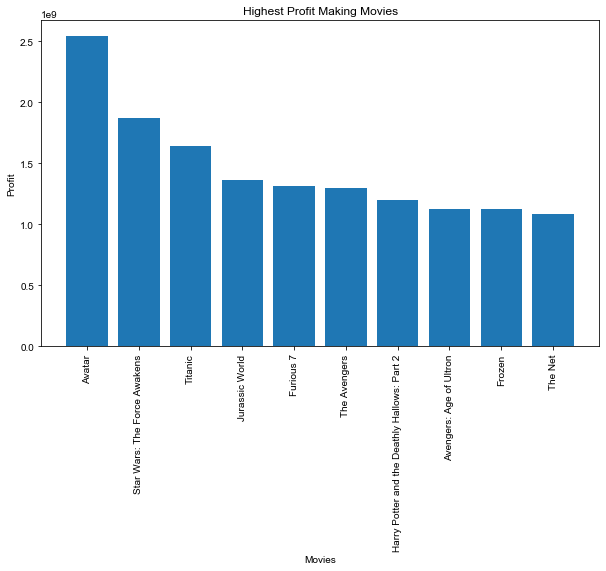

In [460]:
fig, ax = plt.subplots(figsize = (10,6))
high_profit = df.sort_values(by='profit', ascending=False)[:10]
plt.bar(high_profit['original_title'], high_profit['profit'])
plt.xlabel('Movies')
plt.ylabel('Profit')
plt.title('Highest Profit Making Movies')
plt.xticks(rotation=90)
plt.show()

**Findings:** Movie that earned the highest profit is Avatar

### Research Question 2: Are popularity and votings of a movie co-related?

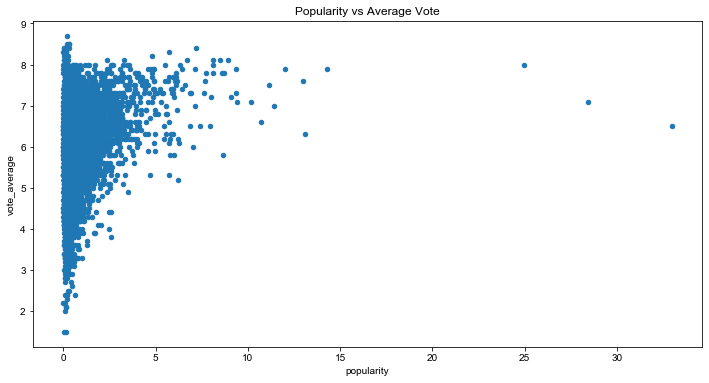

In [468]:
df.plot(x='popularity', y='vote_average', kind='scatter', figsize=(12,6))
plt.title('Popularity vs Average Vote')
plt.show()

**Findings:** Votings have a positive influence in the popularity of the movies.

### Research Question 3: Which actors have been casted the most in the movies?


In [461]:
#define a function that can be used to split the values in the column that are separated by '|' for cast and genres
def extract_data(column_name):
    #separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #sorting values in desc order
    count = all_data.value_counts(ascending = False)
    
    return count

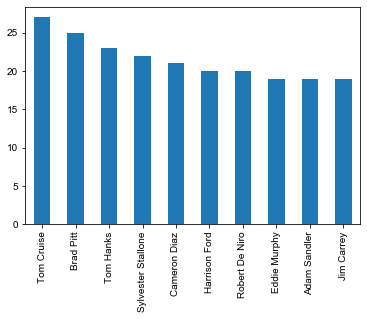

In [462]:
#plotting the results - only top 10
cast_count = extract_data('cast')
cast_count = cast_count.head(10)
cast_count.plot(kind='bar')

**Findings:** Tom Cruise has been casted the most in the movies followed by Brad Pitt and Tom hanks.

### Research Question 4: Which movies received highest votings by the viewers?

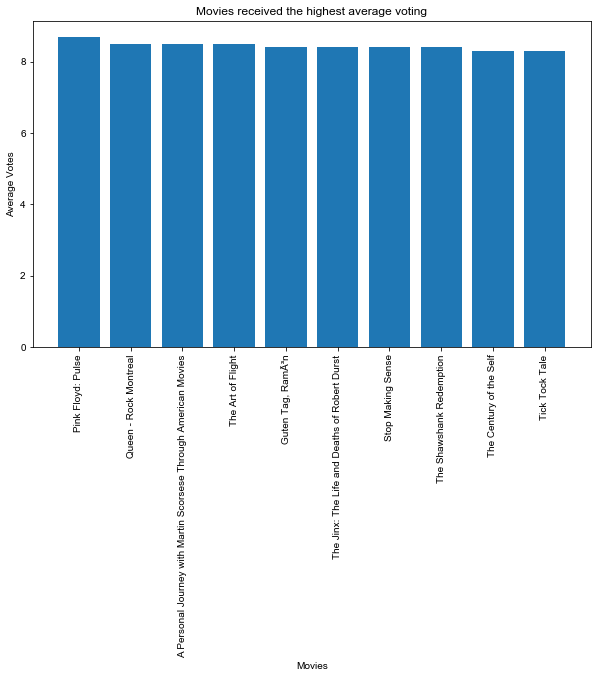

In [463]:
fig, ax = plt.subplots(figsize = (10,6))
high_votes = df.sort_values(by='vote_count', ascending=False)[:20]
high_votes = df.sort_values(by='vote_average', ascending=False)[:10]
plt.bar(high_votes['original_title'], high_votes['vote_average'])
plt.xlabel('Movies')
plt.ylabel('Average Votes')
plt.title('Movies received the highest average voting')
plt.xticks(rotation=90)
plt.show()

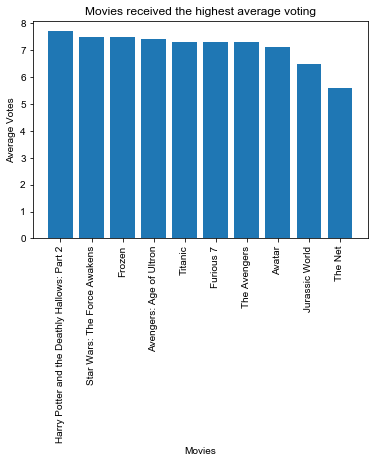

In [467]:
#Checking the rating of the movies that made the highest profit - taking the list from the solution of question-1
high_profit=high_profit.sort_values(by='vote_average', ascending=False)[:10]
plt.bar(high_profit['original_title'], high_profit['vote_average'])
plt.xlabel('Movies')
plt.ylabel('Average Votes')
plt.title('Movies received the highest average voting')
plt.xticks(rotation=90)
plt.show()

**Findings:** Surprisingly enough, all of the top 10 movies that earned the most profit have an average vote of less than 8. The highest profit earned movie 'Avatar' has an average vote of 7.1. Moreover, the 10 movies that earned the highest voting are not in the list of top 10 movies that earned the highest profit. 

### Research Question 5: Which movie genre earned the highest profit?

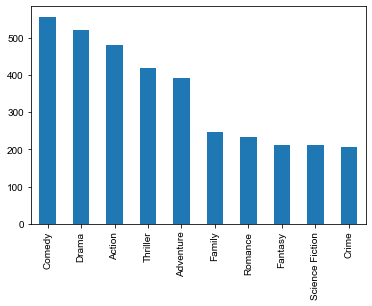

In [465]:
#plotting the results - only top 10
genre_count = extract_data('genres')
genre_count = genre_count.head(10)
genre_count.plot(kind='bar')

**Findings:** The visual shows that Comedy is the genre that earned the most profit it maybe because of its popularity

<a id='conclusions'></a>
## Conclusions

- Movies that made the highest profit is Avatar followed by Star Wars and Titanic
- Votings have a positive influence in the popularity of the movies.
- Celebrities that appeared the most in the movies is Tom Cruise followed by Brad Pitt and Tom Hanks
- Surprisingly, the movies that received highest votings by the viewers are not the movies that made the most profit. Movie that received highest average voting is 'Pink Floyd: Pulse' followed by 'Queen - Rock Montreal' and 'A Personal Journey with Martin Scorsese'
- Comedy is the most popular genre followed by Drama and Action

<a id='limitations'></a>
## Limitations

- The dataset is incomplete as it has missing values which affects the accuracy of the insights generated from this data.
- Incorrect data-type in some colums, release_date and release_year are in string format that needed to be processed and converted into different format for usability.
- Some columns like cast/genres have multiple values seperated by '|' operator.